In [92]:
import numpy as np
import pandas as pd
import seaborn as sns

Wybór zbioru danych
Skorzystajmy z wbudowanego zbioru "Wine dataset" z sklearn.datasets, ponieważ spełnia wymagania:

Ma 13 cech numerycznych
Ma 3 klasy kategoryczne (odpowiadające rodzajom wina)
Kod do załadowania i sprawdzenia zbioru:

In [94]:
from sklearn.datasets import load_wine

# Wczytanie danych
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # Dodanie etykiet klas

# Podgląd pierwszych wierszy
df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


Kontrola struktury danych (analogiczne do widżetu "Select Columns" w Orange)
Sprawdzamy brakujące wartości i typy zmiennych:

In [ ]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

Normalizacja danych (analogiczne do widżetu "Preprocessing" w Orange)
Normalizujemy dane, aby każda cecha miała tę samą skalę:

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])

df_scaled.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,0
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,0
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,0
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,0
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,0


Macierz odległości między wektorami cech
Analogicznie do Orange Distance Map, sprawdzamy macierz odległości:

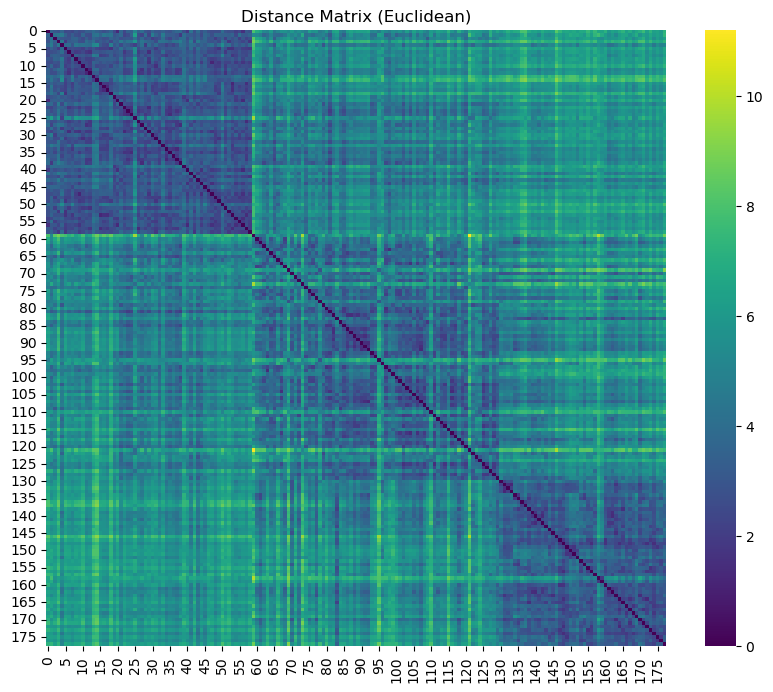

In [ ]:
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

distance_matrix = pairwise_distances(df_scaled.iloc[:, :-1], metric='euclidean')

plt.figure(figsize=(10, 8))
sns.heatmap(distance_matrix, cmap='viridis')
plt.title("Distance Matrix (Euclidean)")
plt.show()


Wybór najlepszej miary odległości
Testujemy różne miary i sprawdzamy, która najlepiej rozdziela klasy:

In [ ]:
from sklearn.metrics import silhouette_score

metrics = ['euclidean', 'manhattan', 'cosine', 'chebyshev']

for metric in metrics:
    dist_matrix = pairwise_distances(df_scaled.iloc[:, :-1], metric=metric)
    np.fill_diagonal(dist_matrix, 0)
    score = silhouette_score(dist_matrix, df_scaled['target'], metric='precomputed')
    print(f"Silhouette Score dla metryki {metric}: {score:.4f}")


Silhouette Score dla metryki euclidean: 0.2798
Silhouette Score dla metryki manhattan: 0.3079
Silhouette Score dla metryki cosine: 0.4520
Silhouette Score dla metryki chebyshev: 0.2093


Sprawdzenie optymalnej metryki w k-NN
Trenujemy klasyfikator k-NN dla różnych metryk i sprawdzamy dokładność (accuracy):

In [99]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df_scaled.iloc[:, :-1], df_scaled['target'], test_size=0.2, random_state=42)

for metric in metrics:
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Dokładność k-NN ({metric}): {acc:.4f}")


Dokładność k-NN (euclidean): 0.9444
Dokładność k-NN (manhattan): 0.9444
Dokładność k-NN (cosine): 0.9722
Dokładność k-NN (chebyshev): 0.9722


PCA – Redukcja do 3 cech
Używamy PCA do redukcji wymiarów do 3:

In [100]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(df_scaled.iloc[:, :-1])

df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2", "PC3"])
df_pca['target'] = df_scaled['target']

df_pca.head()


,PC1,PC2,PC3,target
0,3.316751,1.443463,-0.165739,0
1,2.209465,-0.333393,-2.026457,0
2,2.516740,1.031151,0.982819,0
3,3.757066,2.756372,-0.176192,0
4,1.008908,0.869831,2.026688,0


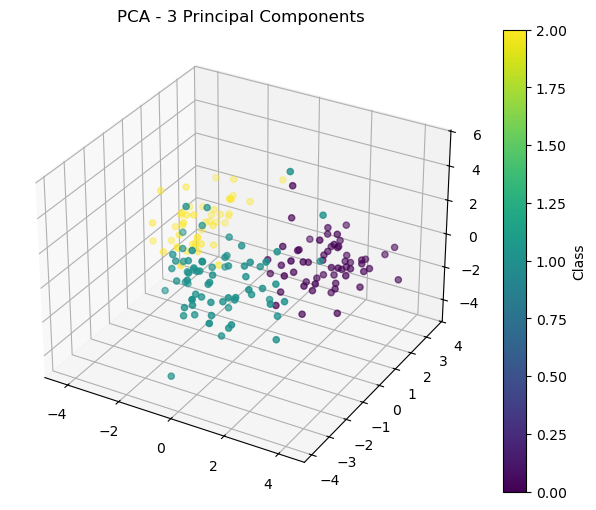

In [101]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=df_pca['target'], cmap='viridis')
plt.colorbar(scatter, label="Class")
plt.title("PCA - 3 Principal Components")
plt.show()


Powtórzenie klasyfikacji k-NN dla PCA
Testujemy k-NN po redukcji PCA:

In [102]:
X_train, X_test, y_train, y_test = train_test_split(df_pca.iloc[:, :-1], df_pca['target'], test_size=0.2, random_state=42)

for metric in metrics:
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Dokładność k-NN po PCA ({metric}): {acc:.4f}")


Dokładność k-NN po PCA (euclidean): 0.9722
Dokładność k-NN po PCA (manhattan): 1.0000
Dokładność k-NN po PCA (cosine): 1.0000
Dokładność k-NN po PCA (chebyshev): 0.9722


# **Raport - Najprostszy klasyfikator i reprezentacja danych**

### **1. Wybór zbioru danych**
W analizie wykorzystano zbór danych **Wine Dataset** dostępny w `scikit-learn`.
Zawiera on 13 cech numerycznych i 3 klasy kategoryczne, co spełnia wymagania zadania.

## **2. Kontrola struktury danych**
- Dane w formacie `pandas.DataFrame`.

## **3. Normalizacja danych**
Dane zostały przeskalowane za pomocą `StandardScaler` z `scikit-learn`.

**Powody normalizacji:**
- Różne cechy miały różne skale wartości (np. `alcohol` ~13, `flavanoids` ~1).
- Standardowe plusy normalizacjitakie jak na przykład poprawienie jakości klasyfikacji itd.

## **4. Macierz odległości**
Obliczono macierz odległości między wektorami cech dla metryki **euklidesowej**.

- **Czy klasy są rozpoznawalne?** mapa ciepła seaborn wskazuje na wyraźne rozgrupowanie się danych.

## **5. Wybór najlepszej miary odległości**
- Wykorzystane miary odległości: **euklidesowa, Manhattan, cosinusowa, czebyszewa**.
Dla każdej metryki obliczono wartość **Silhouette Score**:

| Metryka     | Silhouette Score |
|-------------|------------------|
| Euklidesowa | 0.2798           |
| Manhattan   | 0.3079           |
| Cosinusowa  | 0.4520           |
| Czebyszewa  | 0.2093           |

- Najwyższa wartość wskazuje metrykę najlepiej rozdzielającą klasy. W tym przypadku jest to metryka cosinusowa

## **6. Klasyfikacja k-NN**
Wartości metryk po wykonaniu klasyfikacji k-NN dla **k=5**:

| Metryka     | Accuracy |
|-------------|----------|
| Euklidesowa | 0.9444   |
| Manhattan   | 0.9444   |
| Cosinusowa  | 0.9722   |
| Czebyszewa  | 0.9722   |

Metryka cosinusowa dalej jest metryką najlepiej rozdzielającą dane, jednak warto zauważyć, że dokładnie taki sam wynik osiągnęła metryka czebyszewa, pomimo "uplasowania" się na ostatnim miejscu przy poprzedniej próbie

## **7. Redukcja wymiarów PCA**
Redukcja liczby wymiarów cech do 3 pozwala na ciekawe zwizualizowanie danych w przestrzeni 3-wymiarowej, które sugeruje (niestety narzędzia biblioteki `matplotlib` nie uwzględniają perfekcyjnej perspektywy), że dane są wyraźnie rozdzielone. Znaczy to, że nawet po zastosowaniu analizy głównych składowych, struktura danych wciąż zawiera potrzebne informacje

## **8. Powtórzenie klasyfikacji po PCA**
Wyniki k-NN po zastosowaniu PCA:

| Metryka     | Accuracy po PCA |
|-------------|-----------------|
| Euklidesowa | 0.9722          |
| Manhattan   | 1.0000          |
| Cosinusowa  | 1.0000          |
| Czebyszewa  | 0.9722          |

Metryka cosinusowa dalej pozostaje najwydajniejszą metryką do rozdziału danych. Wraz z metryką manhattańską osiągnęły poziom 100% dokładności podziąłu, co może wskazywać na to, że dane rzeczywiście zostały dobrze rozdzielone w PCA

## **9. Wnioski**
1. **Najlepsza metryka** odległości (według Silhouette Score) pokrywa się z najlepszym wynikiem k-NN.
2. **PCA poprawiło separację klas**, oraz podniosło skuteczność klasyfikacji.
3. **Mapa odległości** Pokazała, że nawet przed PCA, klasy były już wyraźnie oddzielone.